# Load Libraries Test

#### test on import and from

In [1]:
# from : file, import : class
from settings import settings

In [2]:
# test
settings.MyCompanies

['INTC', 'AAPL', 'AMD', 'NVDA', 'GOOG', 'UBER']

In [3]:
settings.API

'yahoo'

# Load Libraries

In [4]:
from settings import settings
from object_factory import object_factory
from mappers import portfolios_allocation_mapper

In [5]:
settings.MyCompanies

['INTC', 'AAPL', 'AMD', 'NVDA', 'GOOG', 'UBER']

# Generate optimum portfolio. Run all functions step by steps

In [6]:
def generate_optimum_portfolio():
    
    #instantiate the objects with the settings
    
    # function lists
    obj_factory = object_factory(settings)
    
    # call functions
    ce = obj_factory.get_companies_extractor() # get companies info
    cp = obj_factory.get_charts_plotter() # get stock charts over given time horizon
    mc = obj_factory.get_metrics_calculator()
    mcs = obj_factory.get_portfolio_generator()
    
    print('0. Get companies')
    companies = ce.get_companies_list()
    print(companies)
    
    price_extractor = obj_factory.get_price_extractor(companies)
#     print(price_extractor)
    
    print('1. Get company stock prices')
    
    end_date = settings.get_end_date()
    start_date = settings.get_start_date(end_date)
    closing_prices = price_extractor.get_prices(settings.PriceEvent, start_date, end_date)
#     print(end_date)
#     print(start_date)
    
    print('2. Plot stock charts')
    #plot stock prices & save data to a file
#     print(closing_prices)
    cp.plot_prices(closing_prices)
    
    print('3. Calculate Daily Returns')
    returns = settings.DailyAssetsReturnsFunction(closing_prices)
    # plot stock daily changes
#     print(returns)
    cp.plot_returns(returns)
    
    print('3.1 Calculate Expected Returns : Cumulative value for 1$ investment')
    # calculate cagr
    cum_return = settings.DailyAssetsCumulativeReturnsFunction(returns)
#     print(cum_return)
    # plot 1$ expected cumulative growth
    cp.plot_cum_daily_return(cum_return)
    
    print('3.2 Calculate Expected Mean Return from daily changes')
    print('To see relation with cumulative value. Getting annual expected return to the power of years of duration.')
    expected_returns = settings.AssetsExpectedReturnsFunction(returns)
#     print(expected_returns)
    cp.plot_expected_returns(expected_returns)
#     print(expected_returns.index)
    
    print('4. Calculate covariance for efficient edge quantification')
    # covariance will be used for optimization after 5
    covariance = settings.AssetsCovarianceFunction(returns)
#     print(covariance)
    
    print('4.1 Visualize daily returns correlation : Scatter')
    print('Having similar scatter trend tickers does not help to mitigate risk')
    cp.plot_correlation_scatter(returns)
#     print(returns.corr())
    
    print('4.2 Calculate daily change correlation coefficiencies : Matrix')
    cp.plot_correlation_matrix(returns)
    
    print('5 Use an optimiser')
    print('5.1 Getting efficient frontier by optimization')
    #generate portfolios
    targets = settings.get_my_targets()
    # expected_returns.index returns tickers
    optimiser = obj_factory.get_optimiser(targets, len(expected_returns.index))
    portfolios_allocations_df = optimiser.generate_portfolios(expected_returns, covariance, settings.RiskFreeRate)
#     print(portfolios_allocations_df)
    # transpose optimisation result, picking up just risk and returns
    portfolio_risk_return_ratio_df = portfolios_allocation_mapper.map_to_risk_return_ratios(portfolios_allocations_df)
    
    # transpose optimisation result, showing asset allocation as well as risk and returns
    portfolio_risk_return_allc_ratio_df = portfolios_allocation_mapper.map_to_risk_return_allc_ratio(portfolios_allocations_df)
#     print(portfolio_risk_return_allc_ratio_df)
    min_risk = mc.get_min_risk(portfolio_risk_return_allc_ratio_df)
    max_sr = mc.get_max_sharpe_ratio(portfolio_risk_return_allc_ratio_df)
    max_return = mc.get_max_return(portfolio_risk_return_allc_ratio_df)
    min_return = mc.get_min_return(portfolio_risk_return_allc_ratio_df)
#     print(max_return)
    
    print('5.2 Add random data by monte carlo')
    # generate portfolios with allocations
    portfolios_allocations_df = mcs.generate_portfolios(expected_returns, covariance, settings.RiskFreeRate)
    portfolio_risk_return_mc_df = portfolios_allocation_mapper.map_to_risk_return_ratios(portfolios_allocations_df)
    
    print('5.3 Plot optimization and random data results')
    # plot portfolios
    cp.plot_efficient_frontier(portfolio_risk_return_ratio_df, min_risk, max_sr, max_return, min_return, portfolio_risk_return_mc_df)
    
    print('5.4 Allocation for optimum portfolios')
    cp.plot_pie(max_sr, min_risk, max_return, min_return)

# Execute everything

0. Get companies
  Ticker
0   INTC
1   AAPL
2    AMD
3   NVDA
4   GOOG
5   UBER
--> Initialised Price Extractor
1. Get company stock prices
--> Fetched prices for: INTC
--> Fetched prices for: AAPL
--> Fetched prices for: AMD
--> Fetched prices for: NVDA
--> Fetched prices for: GOOG
--> Fetched prices for: UBER
2. Plot stock charts


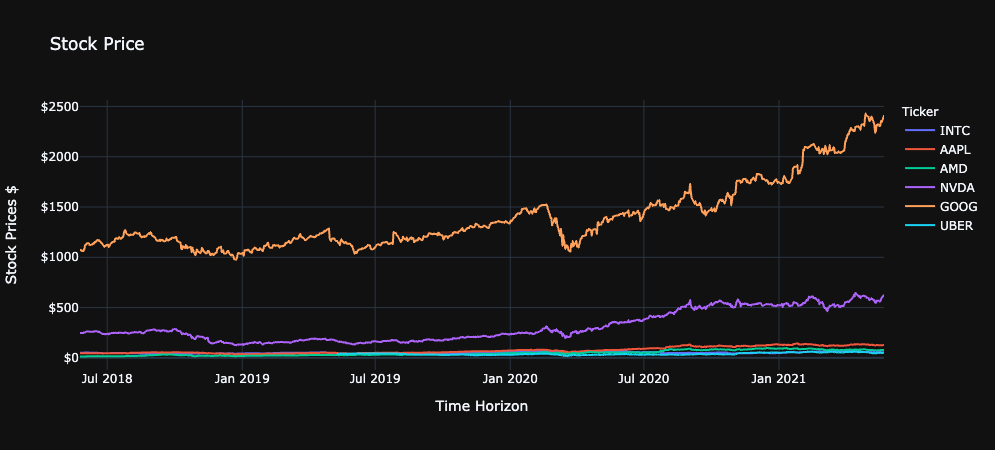

3. Calculate Daily Returns


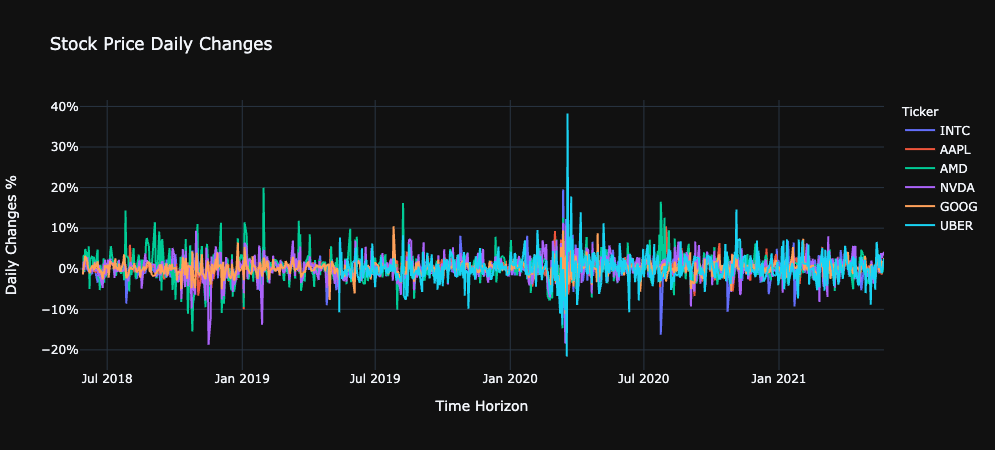

3.1 Calculate Expected Returns : Cumulative value for 1$ investment


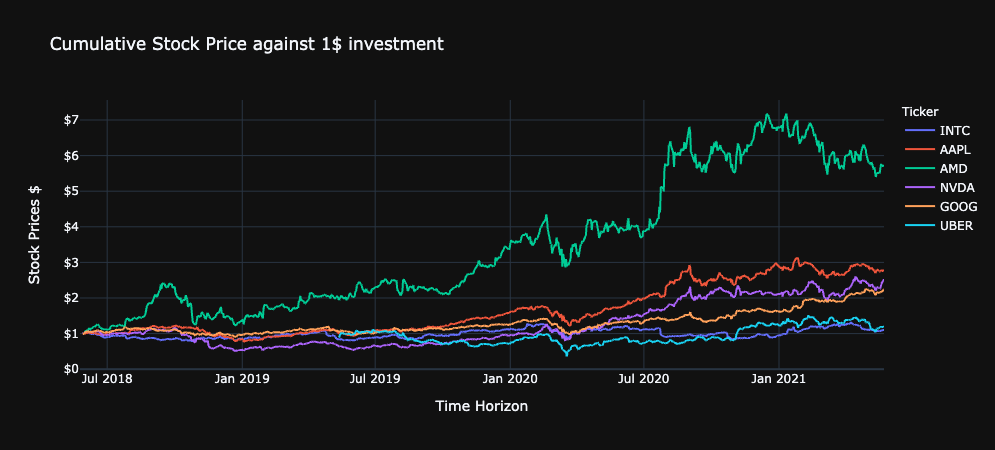

3.2 Calculate Expected Mean Return from daily changes
To see relation with cumulative value. Getting annual expected return to the power of years of duration.


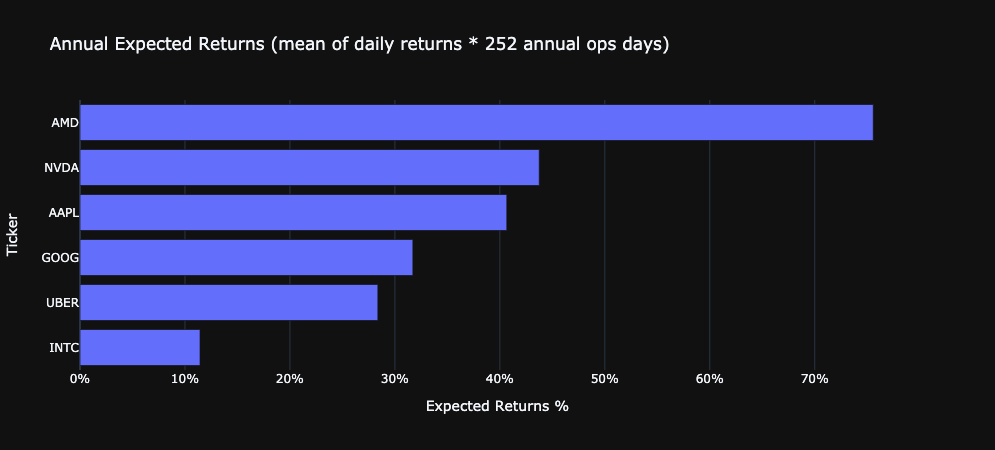

4. Calculate covariance for efficient edge quantification
4.1 Visualize daily returns correlation : Scatter
Having similar scatter trend tickers does not help to mitigate risk


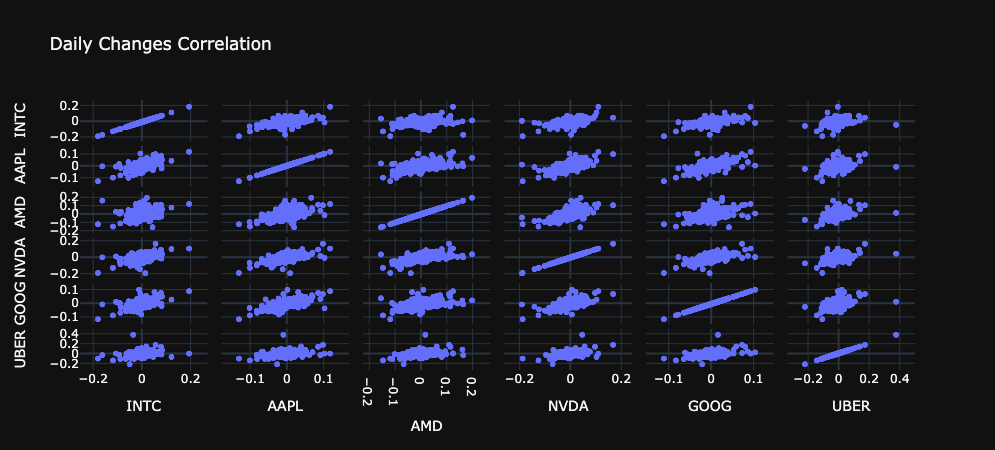

4.2 Calculate daily change correlation coefficiencies : Matrix


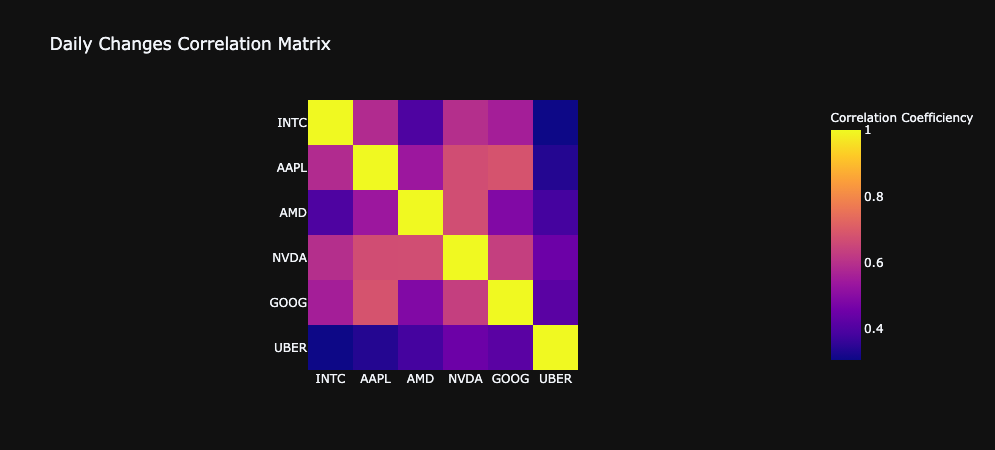

5 Use an optimiser
5.1 Getting efficient frontier by optimization
--> Completed Generating 15 Portfolios
--> Completed Generating 30 Portfolios
--> Completed Generating 45 Portfolios
--> Completed Generating 60 Portfolios
--> Completed Generating 75 Portfolios
--> Completed Generating 90 Portfolios
--> Completed Generating 105 Portfolios
--> Completed Generating 120 Portfolios
--> Completed Generating 135 Portfolios
--> Completed Generating 150 Portfolios
5.2 Add random data by monte carlo
--> Completed Generating 0Portfolios
--> Completed Generating 100Portfolios
--> Completed Generating 200Portfolios
--> Completed Generating 300Portfolios
--> Completed Generating 400Portfolios
--> Completed Generating 500Portfolios
--> Completed Generating 600Portfolios
--> Completed Generating 700Portfolios
--> Completed Generating 800Portfolios
--> Completed Generating 900Portfolios
5.3 Plot optimization and random data results


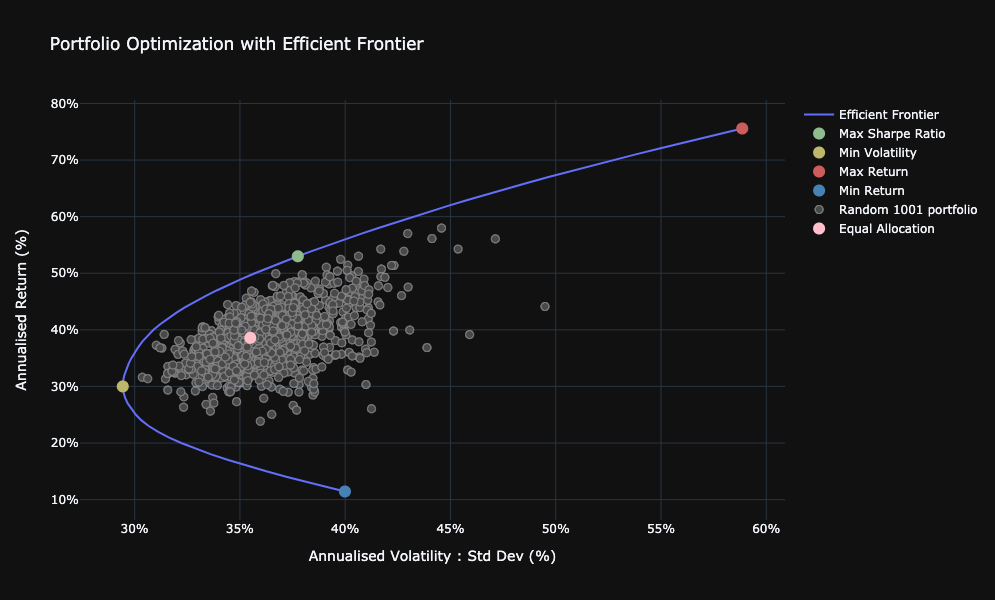

5.4 Allocation for optimum portfolios


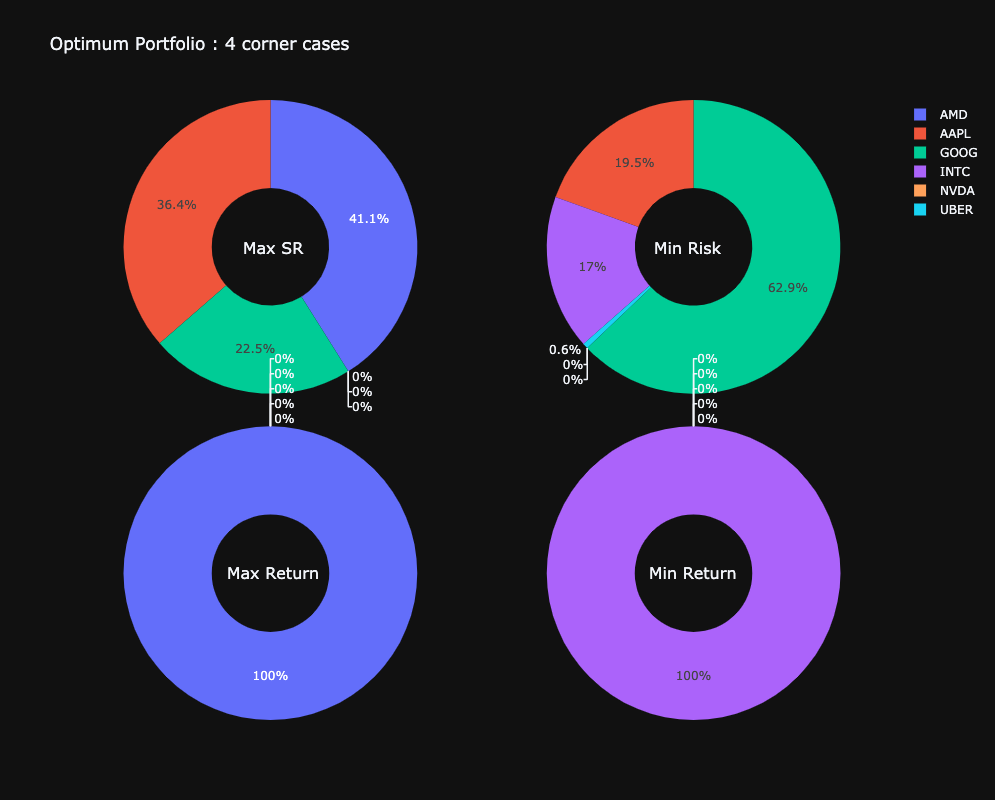

In [7]:
generate_optimum_portfolio()